### Purpose : To build a Stochastic Gradient Descent optimization algorithm

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib.animation import FuncAnimation
from IPython import display
from IPython.display import HTML
import matplotlib.animation as animation

Here, I will try to build a Stochastic gradient descent optimization algorithm class from scratch and side by side run it on a dataset named - 'Student's performance'. The problem I will be working on is a supervised machine learning regression based problem.

This dataset has 10000 rows and (5+1) columns. Predictors = 5, and Label =1.

I will try to calculate the optimized parameters for this given dataset, and also compare it with the sklearn module LinearRegression class.

After that, I will try to plot some graphs which will give a better intuition about how my model is performing with increasing epochs.

In [2]:
# loading the dataset
df = pd.read_csv(r'C:\Users\nilay\OneDrive\Desktop\Dataset\4. Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
# Duplicate makes sense in this dataset. So I will prefer not remove them
df.duplicated().sum()

127

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df['Hours Studied'] = df['Hours Studied'].astype('int16')
df['Previous Scores'] = df['Previous Scores'].astype('int16')
df['Extracurricular Activities'] = df['Extracurricular Activities'].str.replace('Yes','1')
df['Extracurricular Activities'] = df['Extracurricular Activities'].str.replace('No','0')
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype('int8')
df['Sleep Hours'] = df['Sleep Hours'].astype('int8')
df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced'].astype('int8')
df['Performance Index'] = df['Performance Index'].astype('int32')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int16
 1   Previous Scores                   10000 non-null  int16
 2   Extracurricular Activities        10000 non-null  int8 
 3   Sleep Hours                       10000 non-null  int8 
 4   Sample Question Papers Practiced  10000 non-null  int8 
 5   Performance Index                 10000 non-null  int32
dtypes: int16(2), int32(1), int8(3)
memory usage: 107.6 KB


In [9]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [10]:
# splitting my columns into input features(X) and output label(Y)
X = df.iloc[:,:5]
y = df.iloc[:,-1]

In [11]:
# applying MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.75      , 1.        , 1.        , 1.        , 0.11111111],
       [0.375     , 0.71186441, 0.        , 0.        , 0.22222222],
       [0.875     , 0.18644068, 1.        , 0.6       , 0.22222222],
       ...,
       [0.625     , 0.72881356, 1.        , 0.8       , 0.55555556],
       [1.        , 0.96610169, 1.        , 0.6       , 0.        ],
       [0.75      , 0.57627119, 0.        , 0.8       , 0.11111111]])

In [12]:
# applying train-test split
x_train, x_test, y_train, y_test =  train_test_split(X,y,test_size=0.20, random_state = 3)
x_train.shape, x_test.shape

((8000, 5), (2000, 5))

In [13]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [14]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [15]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [16]:
# applying Linear Regression class from sklearn module
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

print('Intercept :',lr.intercept_)
print('Coefficients :',lr.coef_)

y_pred = lr.predict(x_test)
print('r2_score :',r2_score(y_test, y_pred))

Intercept : 11.431028355332565
Coefficients : [22.85079797 60.10251182  0.58220594  2.39340602  1.76086842]
r2_score : 0.9886212862512648


In [17]:
# creating my own class

class StochasticGD :
    def __init__(self, learning_rate = 0.01, epochs = 50):
        self.bias = None
        self.coef = None
        self.lr = learning_rate
        self.epochs = epochs
        self.c=[]
        self.m1 =[]
        self.m2 =[]
        self.m3 =[]
        self.m4 =[]
        self.m5 =[]
        self.cost =[]
        self.nos_epoch =[]
        self.nos_updates=[]
        self.count_=0
        
    def real_time_params (self):
        return self.c, self.m1, self.m2, self.m3, self.m4, self.m5, self.nos_epoch, self.nos_updates, self.cost
        
    def parameters(self):
        return self.bias, self.coef
        
    def fit(self, x_train, y_train):
        self.bias = 0
        self.coef = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            random_nos = np.random.randint(0,x_train.shape[0], x_train.shape[0])
            self.nos_epoch.append(i)
            
            for j in random_nos:
                if j%50 ==0:
                    self.c.append(self.bias)
                    self.m1.append(self.coef[0])
                    self.m2.append(self.coef[1])
                    self.m3.append(self.coef[2])
                    self.m4.append(self.coef[3])
                    self.m5.append(self.coef[4])
                    self.nos_updates.append(self.count_)
                self.count_ +=1
    
                y_hat =  np.dot(x_train[j],self.coef) +self.bias
                loss = np.square(y_train[j] - y_hat)
                if j%50==0:
                    self.cost.append(loss)
                
                slope_bias = -2 * (y_train[j] - y_hat)
                slope_coef = -2 * np.dot((y_train[j] - y_hat),x_train[j])
                
                self.bias = self.bias - (self.lr * slope_bias)
                self.coef = self.coef - (self.lr * slope_coef)
                
    def predict(self, x_test):
        return self.bias + np.dot(x_test, self.coef)

In [18]:
sgd = StochasticGD(learning_rate =0.04 , epochs = 5)
sgd.fit(x_train, y_train)
bias, coef = sgd.parameters()
print('Intercept :',bias)
print('Coefficients :',coef)
y_pred = sgd.predict(x_test)
print('r2_score :',r2_score(y_test,y_pred))

Intercept : 11.09757617578519
Coefficients : [23.13425072 60.14477709  0.58104576  1.50654395  1.90083198]
r2_score : 0.9875384010424477


Result of LinearRegression class of sklearn module -

    Intercept : 11.431028355332565
    Coefficients : [22.85079797 60.10251182  0.58220594  2.39340602  1.76086842]
    r2_score : 0.988621286251264

In [19]:
c, m1, m2, m3 ,m4 ,m5, epoch, iter_, cost = sgd.real_time_params()

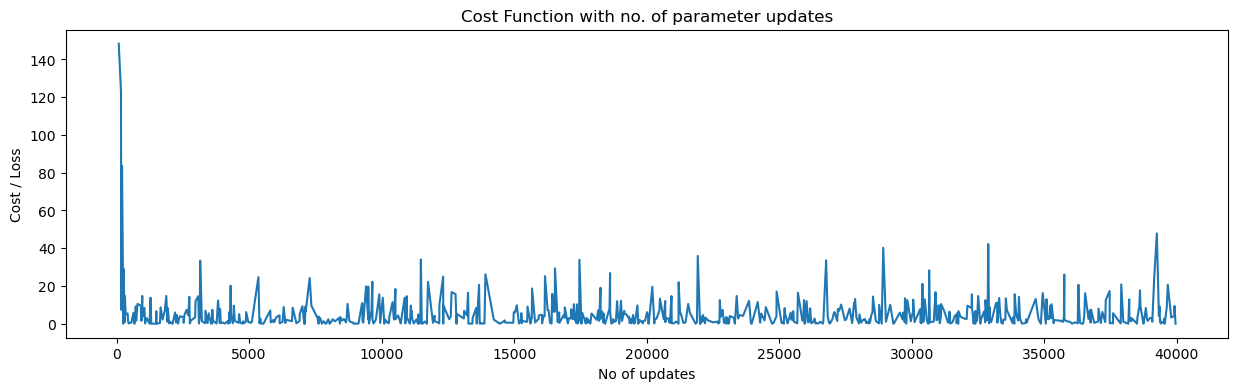

In [20]:
# analysing cost function with increasing updates
plt.figure(figsize=(15,4))
plt.xlabel('No of updates')
plt.ylabel('Cost / Loss')
plt.title('Cost Function with no. of parameter updates')
plt.plot(iter_, cost);

In [21]:
# initializing a figure 
fig = plt.figure(figsize=(10,3)) 
  
# labeling the x-axis and y-axis 
axis = plt.axes(xlim=(-100, 40000),  ylim=(-10, 400)) 
plt.xlabel('Iteration')
plt.ylabel('Loss / Cost')
  
# lists storing x and y values 
x, y = [], [] 
  
line, = axis.plot(0, 0, '--', color='blue') 
  
  
def animate(i): 
    line.set_xdata(iter_[:i]) 
    line.set_ydata(cost[:i]) 
    return line, 
  
  
anim = FuncAnimation(fig, animate, frames=850, interval=10, blit=True) 
fig.suptitle('Cost Function with increasing updates', fontsize=14) 

# video = anim.to_html5_video()
# html = display.HTML(video)
# display.display(html) 
# plt.close() 
writervideo = animation.FFMpegWriter(fps=60) 
anim.save('Stochastic_Gradient_Descent - Cost_Function with increasing parameter updates.mp4', writer=writervideo) 
plt.close() 

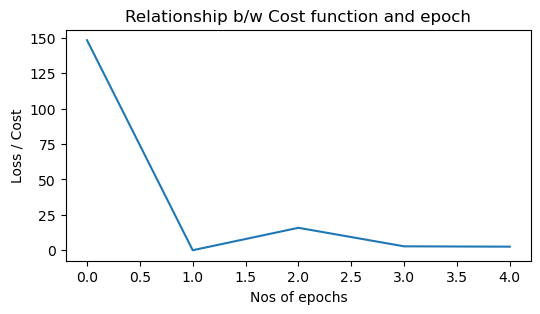

In [22]:
i=0
q=[]
spaces = len(cost)//len(epoch)
for  _ in range(len(epoch)):
    q.append(cost[i])
    i+=spaces
    
plt.figure(figsize=(6,3))
plt.plot(epoch, q)
plt.xlabel('Nos of epochs')
plt.ylabel('Loss / Cost')
plt.title('Relationship b/w Cost function and epoch');


Intercept b0:  11.09757617578519


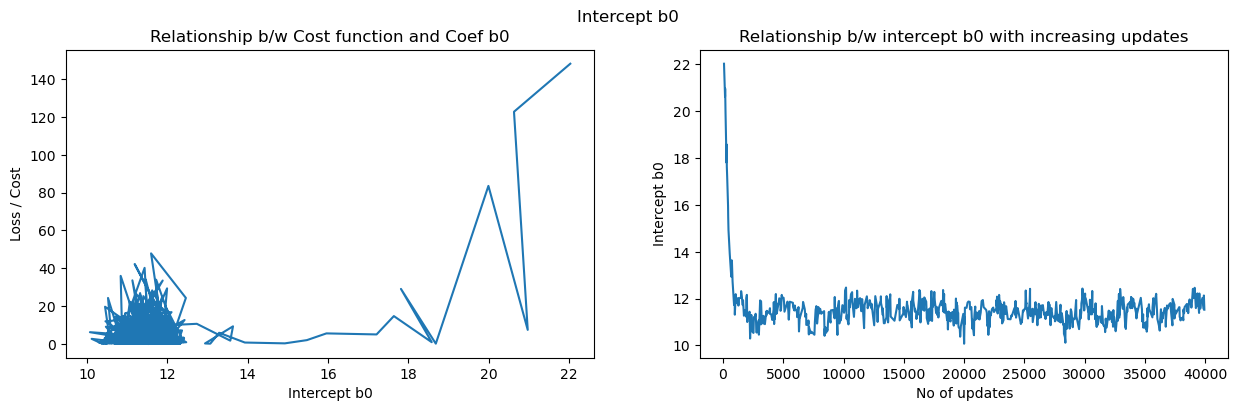

In [23]:
# coef c
print("Intercept b0: ",sgd.bias)

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Intercept b0')
ax[0].plot(c, cost)
ax[0].set_xlabel('Intercept b0')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b0')

ax[1].plot(iter_, c)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Intercept b0')
ax[1].set_title('Relationship b/w intercept b0 with increasing updates');

Coef b1 :  23.134250715261793


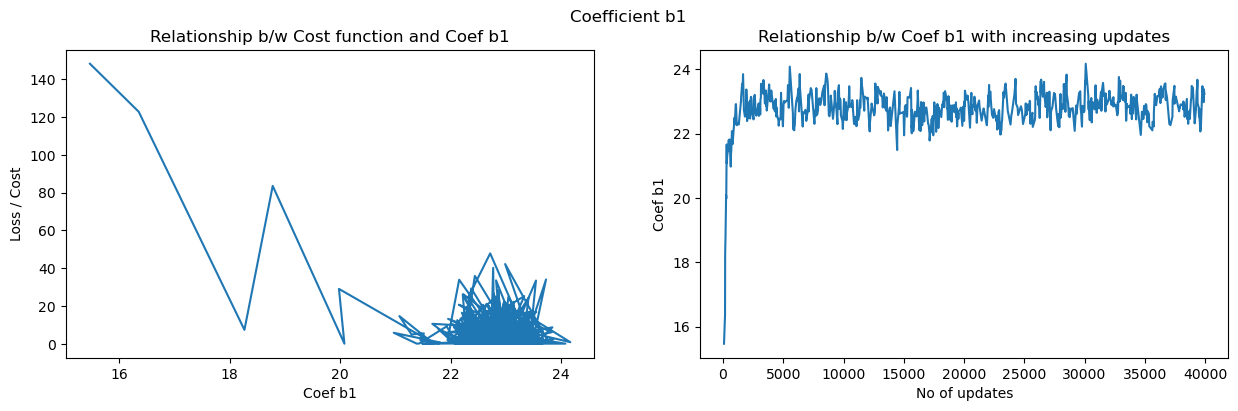

In [24]:
# coef b1
print("Coef b1 : ",sgd.coef[0])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b1')
ax[0].plot(m1, cost)
ax[0].set_xlabel('Coef b1')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b1')

ax[1].plot(iter_, m1)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b1')
ax[1].set_title('Relationship b/w Coef b1 with increasing updates');

Coef b2 :  60.14477708629604


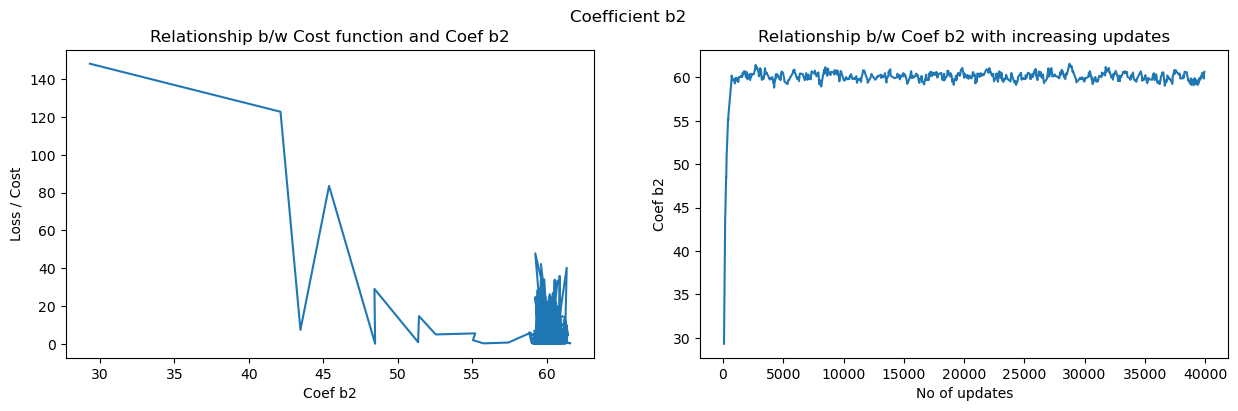

In [25]:
# coef b2
print("Coef b2 : ",sgd.coef[1])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b2')
ax[0].plot(m2, cost)
ax[0].set_xlabel('Coef b2')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b2')

ax[1].plot(iter_, m2)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b2')
ax[1].set_title('Relationship b/w Coef b2 with increasing updates');

Coef b3 :  0.581045757295442


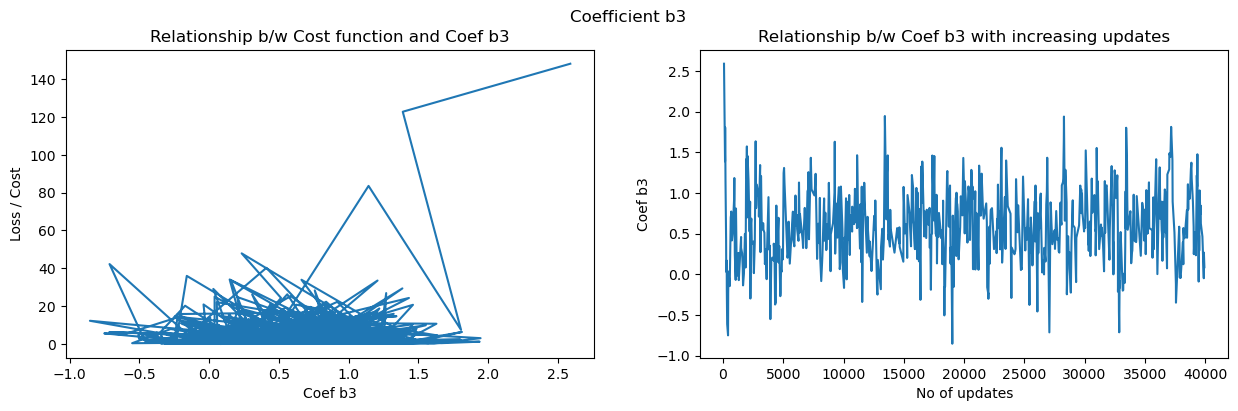

In [26]:
# coef b3
print("Coef b3 : ",sgd.coef[2])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b3')
ax[0].plot(m3, cost)
ax[0].set_xlabel('Coef b3')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b3')

ax[1].plot(iter_, m3)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b3')
ax[1].set_title('Relationship b/w Coef b3 with increasing updates');

Coef b4 :  1.5065439468422799


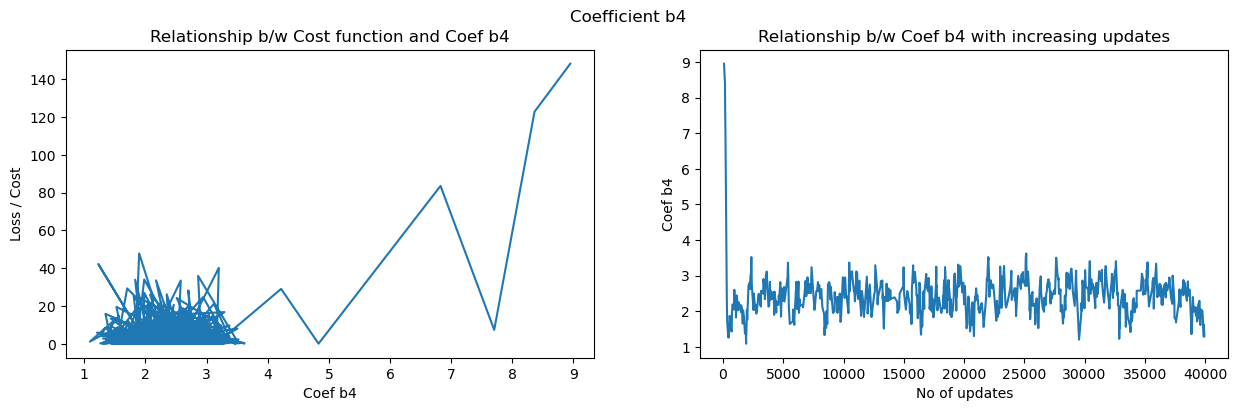

In [27]:
# coef b4
print("Coef b4 : ",sgd.coef[3])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b4')
ax[0].plot(m4, cost)
ax[0].set_xlabel('Coef b4')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b4')

ax[1].plot(iter_, m4)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b4')
ax[1].set_title('Relationship b/w Coef b4 with increasing updates');

Coef b5 :  1.9008319827828968


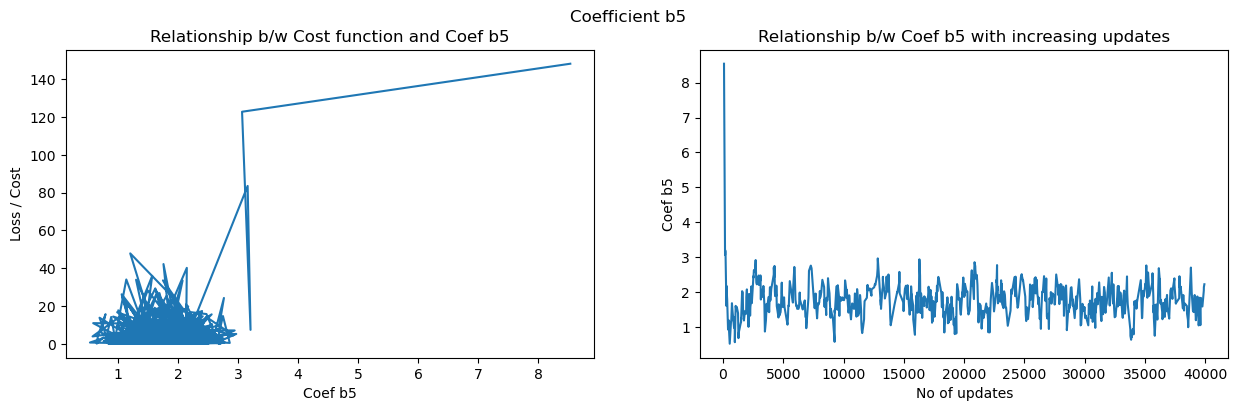

In [28]:
# coef b5
print("Coef b5 : ",sgd.coef[4])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b5')
ax[0].plot(m5, cost)
ax[0].set_xlabel('Coef b5')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b5')

ax[1].plot(iter_, m5)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b5')
ax[1].set_title('Relationship b/w Coef b5 with increasing updates');